In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
import statsmodels.api as sm
import seaborn as sns

In [183]:
# raw = pd.read_csv("ganedago_hourlyagg.csv")
raw = pd.read_csv("snee_hourlyagg.csv")
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,SneeHall.CW.FP/TONS,2022-04-11 22:00:00,H,40.654000,Chilled Water
1,SneeHall.Elec.PowerScout3/kWsystem,2022-04-11 22:00:00,H,121.575000,Electric
2,SneeHall.Elec.Solar.PowerScout3037/kW_System,2022-04-11 22:00:00,H,0.075000,Photovoltaic Power Production
3,SneeHall.STM.M22-V/AverageMassFlow,2022-04-11 22:00:00,H,354.747650,Steam
4,SneeHall.CW.FP/TONS,2022-04-11 23:00:00,H,31.490325,Chilled Water
...,...,...,...,...,...
34090,SneeHall.STM.M22-V/AverageMassFlow,2023-04-02 02:00:00,H,295.434675,Steam
34091,SneeHall.CW.FP/TONS,2023-04-02 03:00:00,H,3.930767,Chilled Water
34092,SneeHall.Elec.PowerScout3/kWsystem,2023-04-02 03:00:00,H,108.325000,Electric
34093,SneeHall.Elec.Solar.PowerScout3037/kW_System,2023-04-02 03:00:00,H,0.000000,Photovoltaic Power Production


In [184]:
weather = pd.read_csv("ithaca_weather.csv")
weather

,time,temperature_2m (°F),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,2022-04-01T00:00,56.3,37,6,23,60,3,1,2,6.7
1,2022-04-01T01:00,54.5,27,4,17,44,0,0,0,0.0
2,2022-04-01T02:00,48.8,37,25,21,7,0,0,0,0.0
3,2022-04-01T03:00,44.8,72,47,48,2,0,0,0,0.0
4,2022-04-01T04:00,42.7,100,86,65,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
8779,2023-04-01T19:00,69.4,88,0,97,99,735,588,147,830.6
8780,2023-04-01T20:00,67.7,90,0,100,100,411,144,267,517.7
8781,2023-04-01T21:00,58.9,94,6,98,98,92,0,92,87.9
8782,2023-04-01T22:00,52.7,78,1,85,86,52,0,52,0.0


In [185]:
weather["time"] = weather["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M").strftime("%Y-%m-%d %H:%M:%S"))
weather

,time,temperature_2m (°F),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,2022-04-01 00:00:00,56.3,37,6,23,60,3,1,2,6.7
1,2022-04-01 01:00:00,54.5,27,4,17,44,0,0,0,0.0
2,2022-04-01 02:00:00,48.8,37,25,21,7,0,0,0,0.0
3,2022-04-01 03:00:00,44.8,72,47,48,2,0,0,0,0.0
4,2022-04-01 04:00:00,42.7,100,86,65,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
8779,2023-04-01 19:00:00,69.4,88,0,97,99,735,588,147,830.6
8780,2023-04-01 20:00:00,67.7,90,0,100,100,411,144,267,517.7
8781,2023-04-01 21:00:00,58.9,94,6,98,98,92,0,92,87.9
8782,2023-04-01 22:00:00,52.7,78,1,85,86,52,0,52,0.0


In [186]:
grid = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Electric"]
grid.columns = ["time", "grid"]
grid = grid.set_index("time")
display(grid)

solar = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Photovoltaic Power Production"]
solar.columns = ["time", "solar"]
solar = solar.set_index("time")
display(solar)

# grid = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Building Electric"]
# grid.columns = ["time", "grid"]
# grid = grid.set_index("time")
# display(grid)

# solar = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Solar Generation meter"]
# solar.columns = ["time", "solar"]
# solar = solar.set_index("time")
# display(solar)

,grid
time,
2022-04-11 22:00:00,121.575
2022-04-11 23:00:00,122.625
2022-04-12 00:00:00,127.925
2022-04-12 01:00:00,127.425
2022-04-12 02:00:00,116.800
...,...
2023-04-01 23:00:00,112.400
2023-04-02 00:00:00,107.150
2023-04-02 01:00:00,106.875


,solar
time,
2022-04-11 22:00:00,0.075
2022-04-11 23:00:00,0.000
2022-04-12 00:00:00,0.000
2022-04-12 01:00:00,0.000
2022-04-12 02:00:00,0.000
...,...
2023-04-01 23:00:00,0.000
2023-04-02 00:00:00,0.000
2023-04-02 01:00:00,0.000


In [187]:
df = grid.join(solar, on="time", how="inner").reset_index()
# df = pd.concat([grid, solar], axis=1, join="inner").reset_index()
df

,time,grid,solar
0,2022-04-11 22:00:00,121.575,0.075
1,2022-04-11 23:00:00,122.625,0.000
2,2022-04-12 00:00:00,127.925,0.000
3,2022-04-12 01:00:00,127.425,0.000
4,2022-04-12 02:00:00,116.800,0.000
...,...,...,...
8519,2023-04-01 23:00:00,112.400,0.000
8520,2023-04-02 00:00:00,107.150,0.000
8521,2023-04-02 01:00:00,106.875,0.000
8522,2023-04-02 02:00:00,111.200,0.000


In [188]:
weather = weather.set_index("time")
df = df.join(weather, on="time", how="inner").reset_index()
df

,index,time,grid,solar,temperature_2m (°F),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,0,2022-04-11 22:00:00,121.575,0.075,59.1,75,0,75,100,206,82,124,397.6
1,1,2022-04-11 23:00:00,122.625,0.000,53.4,64,0,57,100,77,13,64,120.0
2,2,2022-04-12 00:00:00,127.925,0.000,50.4,74,14,53,100,7,0,7,17.1
3,3,2022-04-12 01:00:00,127.425,0.000,49.9,100,53,89,100,0,0,0,0.0
4,4,2022-04-12 02:00:00,116.800,0.000,49.3,100,85,98,98,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,8515,2023-04-01 19:00:00,123.175,0.850,69.4,88,0,97,99,735,588,147,830.6
8516,8516,2023-04-01 20:00:00,107.875,0.125,67.7,90,0,100,100,411,144,267,517.7
8517,8517,2023-04-01 21:00:00,107.450,0.425,58.9,94,6,98,98,92,0,92,87.9
8518,8518,2023-04-01 22:00:00,111.050,0.250,52.7,78,1,85,86,52,0,52,0.0


In [189]:
df["hour"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()).hour)
df["time"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
df = df.dropna()
display(df)

,index,time,grid,solar,temperature_2m (°F),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),hour
0,0,2022-04-11 18:00:00-04:00,121.575,0.075,59.1,75,0,75,100,206,82,124,397.6,18
1,1,2022-04-11 19:00:00-04:00,122.625,0.000,53.4,64,0,57,100,77,13,64,120.0,19
2,2,2022-04-11 20:00:00-04:00,127.925,0.000,50.4,74,14,53,100,7,0,7,17.1,20
3,3,2022-04-11 21:00:00-04:00,127.425,0.000,49.9,100,53,89,100,0,0,0,0.0,21
4,4,2022-04-11 22:00:00-04:00,116.800,0.000,49.3,100,85,98,98,0,0,0,0.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,8515,2023-04-01 15:00:00-04:00,123.175,0.850,69.4,88,0,97,99,735,588,147,830.6,15
8516,8516,2023-04-01 16:00:00-04:00,107.875,0.125,67.7,90,0,100,100,411,144,267,517.7,16
8517,8517,2023-04-01 17:00:00-04:00,107.450,0.425,58.9,94,6,98,98,92,0,92,87.9,17
8518,8518,2023-04-01 18:00:00-04:00,111.050,0.250,52.7,78,1,85,86,52,0,52,0.0,18


In [190]:
grouped = df.groupby("hour").mean().reset_index()
grouped

,hour,index,grid,solar,temperature_2m (°F),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,0,4253.639437,115.050845,0.000000,49.658310,48.208451,28.712676,29.205634,35.098592,0.000000,0.000000,0.000000,0.000000
1,1,4256.730337,114.700211,0.000000,49.173596,49.008427,29.474719,29.022472,37.112360,0.000000,0.000000,0.000000,0.000000
2,2,4245.000000,114.896893,0.000000,48.763559,49.163842,30.593220,27.460452,36.909605,0.000000,0.000000,0.000000,0.000000
3,3,4256.639437,115.061620,0.000000,48.297183,49.642254,31.369014,27.642254,36.185915,0.000000,0.000000,0.000000,0.000000
4,4,4257.639437,115.323592,0.000000,47.882254,49.746479,32.760563,27.873239,35.828169,0.000000,0.000000,0.000000,0.000000
5,5,4258.639437,116.771197,0.000000,47.447606,49.605634,32.628169,27.647887,35.718310,0.000000,0.000000,0.000000,0.000000
6,6,4259.639437,115.413169,0.010352,47.136056,51.921127,33.140845,30.053521,36.160563,0.661972,0.132394,0.529577,0.000000
7,7,4260.639437,115.518474,0.077113,47.312394,52.236620,33.712676,31.180282,36.873239,19.560563,9.746479,9.814085,24.060000
8,8,4261.639437,117.619085,0.346972,48.640282,52.670423,34.385915,30.149296,37.515493,81.521127,47.169014,34.352113,120.031268
9,9,4262.639437,124.318521,0.707606,50.771268,53.219718,35.709859,30.360563,38.036620,191.583099,116.909859,74.673239,265.592113


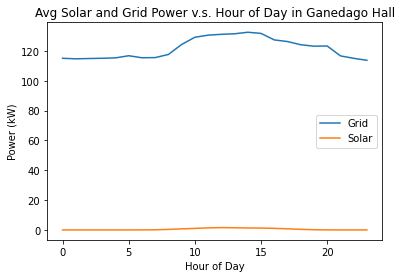

In [191]:
plt.plot(grouped["hour"], grouped["grid"])
plt.plot(grouped["hour"], grouped["solar"])
plt.title("Avg Solar and Grid Power v.s. Hour of Day in Ganedago Hall")
plt.xlabel("Hour of Day")
plt.ylabel("Power (kW)")
plt.legend(["Grid", "Solar"])

Series([], Name: cloudcover (%), dtype: int64)

14      1.526339
15      1.512789
16      1.377285
17      1.621192
18      1.756696
          ...   
8513    1.729595
8514    1.458587
8515    0.632013
8516    0.604913
8517    0.550711
Length: 3548, dtype: float64


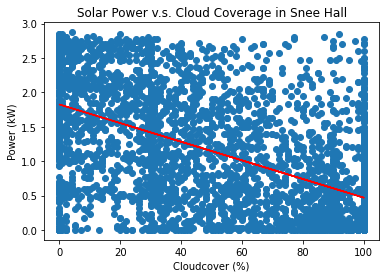

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solar   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     1691.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.51e-302
Time:                        21:00:09   Log-Likelihood:                -3823.4
No. Observations:                3548   AIC:                             7651.
Df Residuals:                    3546   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8244      0.022     83.279      0.000       1.781       1.867
cloudcover (%)    -0.0136      0.000    -41.117      0.000      -0.014      -0.013
==============================================================================
Omnibus:                       43.340   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.346
Skew:                           0.265   Prob(JB):                     2.35e-10
Kurtosis:                       2.866   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
daylight = df[(df["hour"] > 7) & (df["hour"] < 18)]

X = daylight["cloudcover (%)"]
Y = daylight["solar"]

# plt.scatter(X, Y)

display(X[X.isna()])

X = sm.add_constant(X)
model_q1 = sm.OLS(Y, X).fit()
predictions = model_q1.predict(X)
print(predictions)

plt.scatter(X["cloudcover (%)"], Y)
plt.plot(X["cloudcover (%)"], predictions, c="red")
plt.title("Solar Power v.s. Cloud Coverage in Snee Hall")
plt.xlabel("Cloudcover (%)")
plt.ylabel("Power (kW)")
plt.show()

model_q1.summary()

,direct_radiation (W/m²)
hour,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.132394
7,9.746479
8,47.169014


<AxesSubplot:ylabel='hour'>

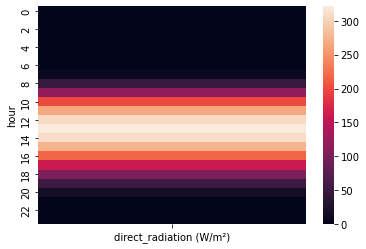

In [193]:
# Add heatmap and use multiple features in weather dataset in heat map to see correlations
# X_2 = daylight[["solar", "cloudcover (%)", "direct_radiation (W/m²)"]]
# X_2 = X_2.set_index("solar")
# display(X_2)
# sns.heatmap(X_2, linewidth=0.5)

X_2 = grouped[["hour", "direct_radiation (W/m²)"]]
X_2 = X_2.set_index("hour")
display(X_2)
sns.heatmap(X_2)

,solar,grid
hour,,
0,0.000000,115.050845
1,0.000000,114.700211
2,0.000000,114.896893
3,0.000000,115.061620
4,0.000000,115.323592
5,0.000000,116.771197
6,0.010352,115.413169
7,0.077113,115.518474
8,0.346972,117.619085


Text(33.0, 0.5, 'Hour of Day')

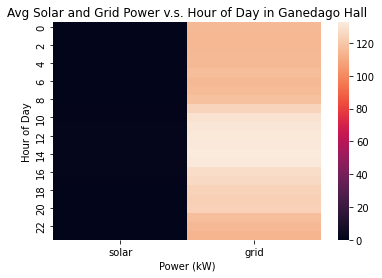

In [194]:
X_2 = grouped[["hour", "solar", "grid"]]
X_2 = X_2.set_index("hour")
display(X_2)
sns.heatmap(X_2)
plt.title("Avg Solar and Grid Power v.s. Hour of Day in Ganedago Hall")
plt.xlabel("Power (kW)")
plt.ylabel("Hour of Day")


In [195]:
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.345884,0.363128,0.126892,0.496811,0.495827,0.524495,0.043962,0.040936,0.308549,0.003793,0.170001,0.756208
1,0.882524,0.634405,0.887602,0.351215,0.888507,0.622498,0.162893,0.188450,0.290759,0.504295,0.243286,0.085362
2,0.895015,0.919559,0.109617,0.485955,0.237890,0.685592,0.064678,0.835865,0.562166,0.564872,0.834885,0.353933
3,0.604273,0.017892,0.835084,0.091024,0.156340,0.574132,0.432753,0.577076,0.733462,0.700333,0.346151,0.593441
4,0.358529,0.906910,0.619974,0.602027,0.394568,0.969543,0.946156,0.516223,0.836907,0.006761,0.956720,0.450207
5,0.464217,0.855985,0.274425,0.454253,0.040200,0.460058,0.253448,0.052249,0.920619,0.090648,0.761495,0.722229
6,0.360520,0.353298,0.194670,0.293152,0.492185,0.197751,0.744999,0.089600,0.407142,0.027408,0.546026,0.876492
7,0.741950,0.289967,0.873907,0.766887,0.432131,0.672985,0.166788,0.086195,0.526812,0.780666,0.430327,0.365162
8,0.879610,0.043775,0.563103,0.381190,0.670681,0.745868,0.954221,0.275019,0.242806,0.074272,0.426257,0.015081
9,0.563212,0.703908,0.728267,0.212137,0.717403,0.566220,0.575149,0.584634,0.857921,0.505510,0.874167,0.355523


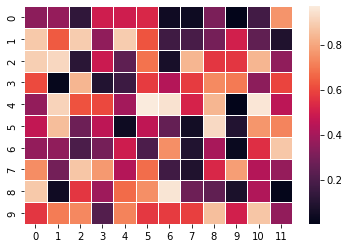

In [196]:
uniform_data = np.random.rand(10, 12)
ud = pd.DataFrame(uniform_data)
display(ud)
ax = sns.heatmap(ud, linewidth=0.5)